In [74]:
import pickle


In [189]:
with open('my_dict.pkl', 'rb') as f:
    result = pickle.load(f)

with open('graph.pkl', 'rb') as f:
    graph = pickle.load(f)

In [190]:
# 변수 설정
time_set = dict()
time_set['start_time'] = 9
time_set['end_time'] = 18
time_set['load_rest_time'] = 0.3

shortest_path_dict = graph.get_shortest_path_dict()

In [125]:
def print_tp_block_num(transporter):
    for block in transporter.works:
        print(f'block_no: {block.no}, job: {block.start_node} -> {block.end_node}', end=' ')
    print()



In [129]:
def fitness(individual, time_set, shortest_path_dict):
    start_time = time_set['start_time']
    end_time = time_set['end_time']
    load_rest_time = time_set['load_rest_time']
    total_time = 0  # 모든 트랜스포터가 일을 마치는 시간을 계산
    DOCK = 1 # 트랜스포터 시작 노드
    result = dict()
    fitness_score = 0
    empty_tp_score = 1000

    for transporter in individual:
        result[transporter.no] = []
        cur_time = start_time  # 작업을 시작할 수 있는 가장 빠른 시간
        cur_node = DOCK  # 현재 위치는 도크

        if not transporter.works:
            fitness_score += empty_tp_score
            if transporter.available_weight > 500:
                fitness_score += empty_tp_score // 100

        for block in transporter.works:
            dist = shortest_path_dict[cur_node][block.start_node] / 1000  # 이전 위치에서 현재 블록까지 이동한 거리
            cur_time += dist / transporter.empty_speed  # 이동 시간 추가

            cur_time = max(cur_time, block.start_time)  # 블록의 작업 시작 시간 이전에 도착한 경우, 해당 시간까지 대기
            cur_time += (shortest_path_dict[block.start_node][block.end_node] / 1000) / transporter.work_speed  # 블록을 운반하는데 걸리는 시간 추가
            cur_time += load_rest_time
            cur_node = block.end_node  # 현재 위치를 블록의 종료 위치로 업데이트
            result[transporter.no].append({
                'block': block.no,
                'pos': f'{block.start_node} -> {block.end_node}',
                'end_time': cur_time,
            })

        total_time = max(total_time, cur_time)  # 모든 트랜스포터가 일을 마치는 시간 업데이트


    fitness_score += 1 / total_time * 1

    for transporter in individual:
        if any(work.weight > transporter.available_weight for work in transporter.works):
            fitness_score *= 0.5

    if total_time >= end_time:  # 전체 작업 완료 시간이 18시를 초과하면 해당 해는 유효하지 않음
        fitness_score *= 0.5

    return result  # 전체 작업 완료 시간의 역수를 반환하여 적합도 계산

In [142]:
re = fitness(result['best_individual'], time_set, shortest_path_dict)



In [143]:
for key in re.keys():
    works = re[key]
    if re[key]:
        print(key)
        for block in re[key]:
            print(block)

6
{'block': 2, 'pos': '42 -> 8', 'end_time': 12.84}
{'block': 5, 'pos': '18 -> 8', 'end_time': 13.446666666666667}
{'block': 10, 'pos': '51 -> 43', 'end_time': 14.158333333333335}
{'block': 45, 'pos': '18 -> 14', 'end_time': 14.75166666666667}
{'block': 61, 'pos': '12 -> 15', 'end_time': 15.578333333333338}
{'block': 98, 'pos': '34 -> 42', 'end_time': 16.522000000000006}
7
{'block': 42, 'pos': '44 -> 27', 'end_time': 11.733333333333334}
{'block': 43, 'pos': '15 -> 18', 'end_time': 13.463333333333335}
{'block': 58, 'pos': '47 -> 48', 'end_time': 14.156666666666668}
11
{'block': 15, 'pos': '26 -> 48', 'end_time': 13.846666666666668}
{'block': 21, 'pos': '31 -> 32', 'end_time': 14.506666666666668}
{'block': 28, 'pos': '29 -> 5', 'end_time': 15.484000000000002}
{'block': 55, 'pos': '51 -> 5', 'end_time': 16.509000000000004}
12
{'block': 17, 'pos': '14 -> 29', 'end_time': 9.992333333333333}
{'block': 19, 'pos': '34 -> 42', 'end_time': 12.680000000000001}
{'block': 23, 'pos': '32 -> 12', 'en

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


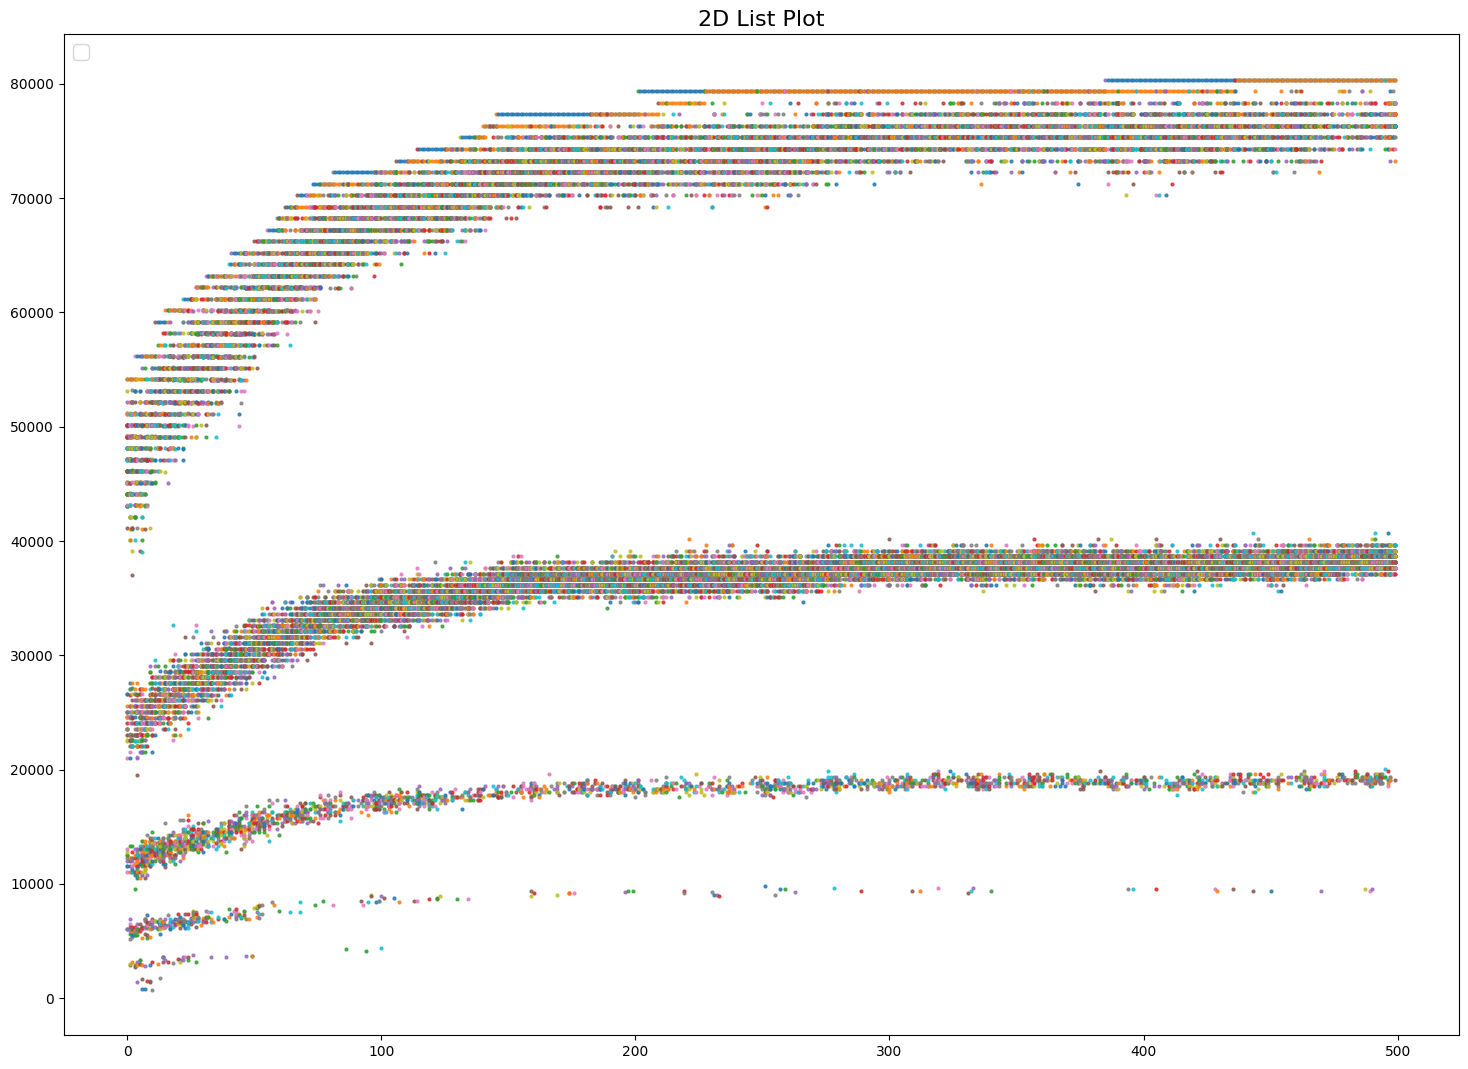

In [122]:
import matplotlib.pyplot as plt

# 2차원 리스트 생성 (3x3)
data = result['fitness'][:500]

# 리스트의 크기 (row, col) 설정
num_rows = len(data)
num_cols = len(data[0])

# x축, y축 값 생성
x_values = list(range(num_cols))
y_values = list(range(num_rows))

# 그래프 크기 설정
plt.figure(figsize=(18, 13))

# 그래프 그리기
for i in range(num_rows):
    for j in range(num_cols):
        plt.plot(i, data[i][j], 'o', linewidth=2, markersize=2, alpha=0.8)



# 그래프 제목 설정
plt.title('2D List Plot', fontsize=16)

# 범례 표시
plt.legend(loc='upper left', fontsize=14)

# 그래프 표시
plt.show()


In [144]:
import networkx as nx

# 그래프 생성
G = nx.Graph()

# 그래프에 노드 추가
G.add_nodes_from([1, 2, 3, 4, 5])

# 그래프에 엣지 추가
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5), (1, 5)])

# 클러스터 계수 계산
cc = nx.clustering(G)

# 전체 클러스터 계수 평균 계산
avg_cc = sum(cc.values()) / len(cc)

print("클러스터 계수:", cc)
print("평균 클러스터 계수:", avg_cc)


클러스터 계수: {1: 0.3333333333333333, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 0}
평균 클러스터 계수: 0.39999999999999997


클러스터 0
[46, 47, 48, 49, 50, 51, 52]
클러스터 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 45]
클러스터 2
[11, 12, 16, 17]
클러스터 3
[13, 14, 15, 41, 42, 43, 44]
클러스터 4
[18, 19, 20, 21]
클러스터 5
[22, 23, 24, 39, 40]
클러스터 6
[25, 26, 27, 29, 30, 33, 34, 35, 36, 37, 38]
클러스터 7
[28, 31, 32]


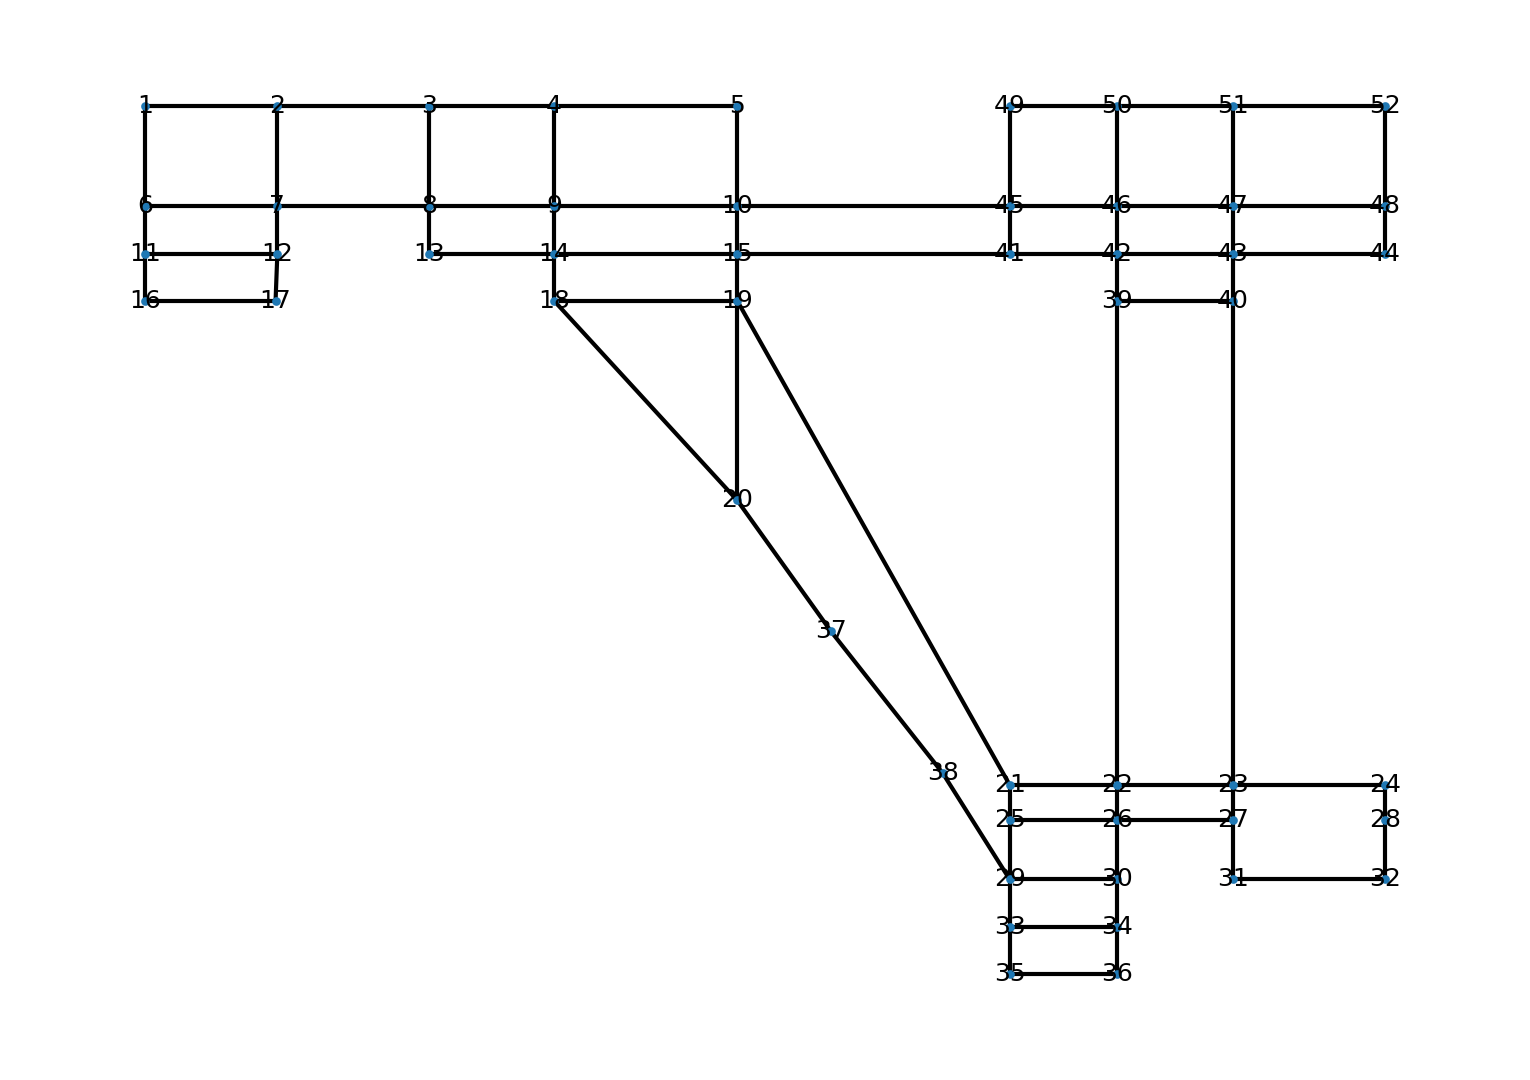

In [215]:
import networkx as nx
import community

# 그래프 생성
G = graph.graph
fig = plt.figure(figsize=(10, 7), dpi=150)
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, node_size=10, width=2,
        with_labels=True)

# Louvain 알고리즘으로 클러스터링
partition = community.best_partition(G, resolution=1)
# 클러스터 출력
for i in set(partition.values()):
    print("클러스터", i)
    members = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print(members)

# 그래프 출력
plt.show()

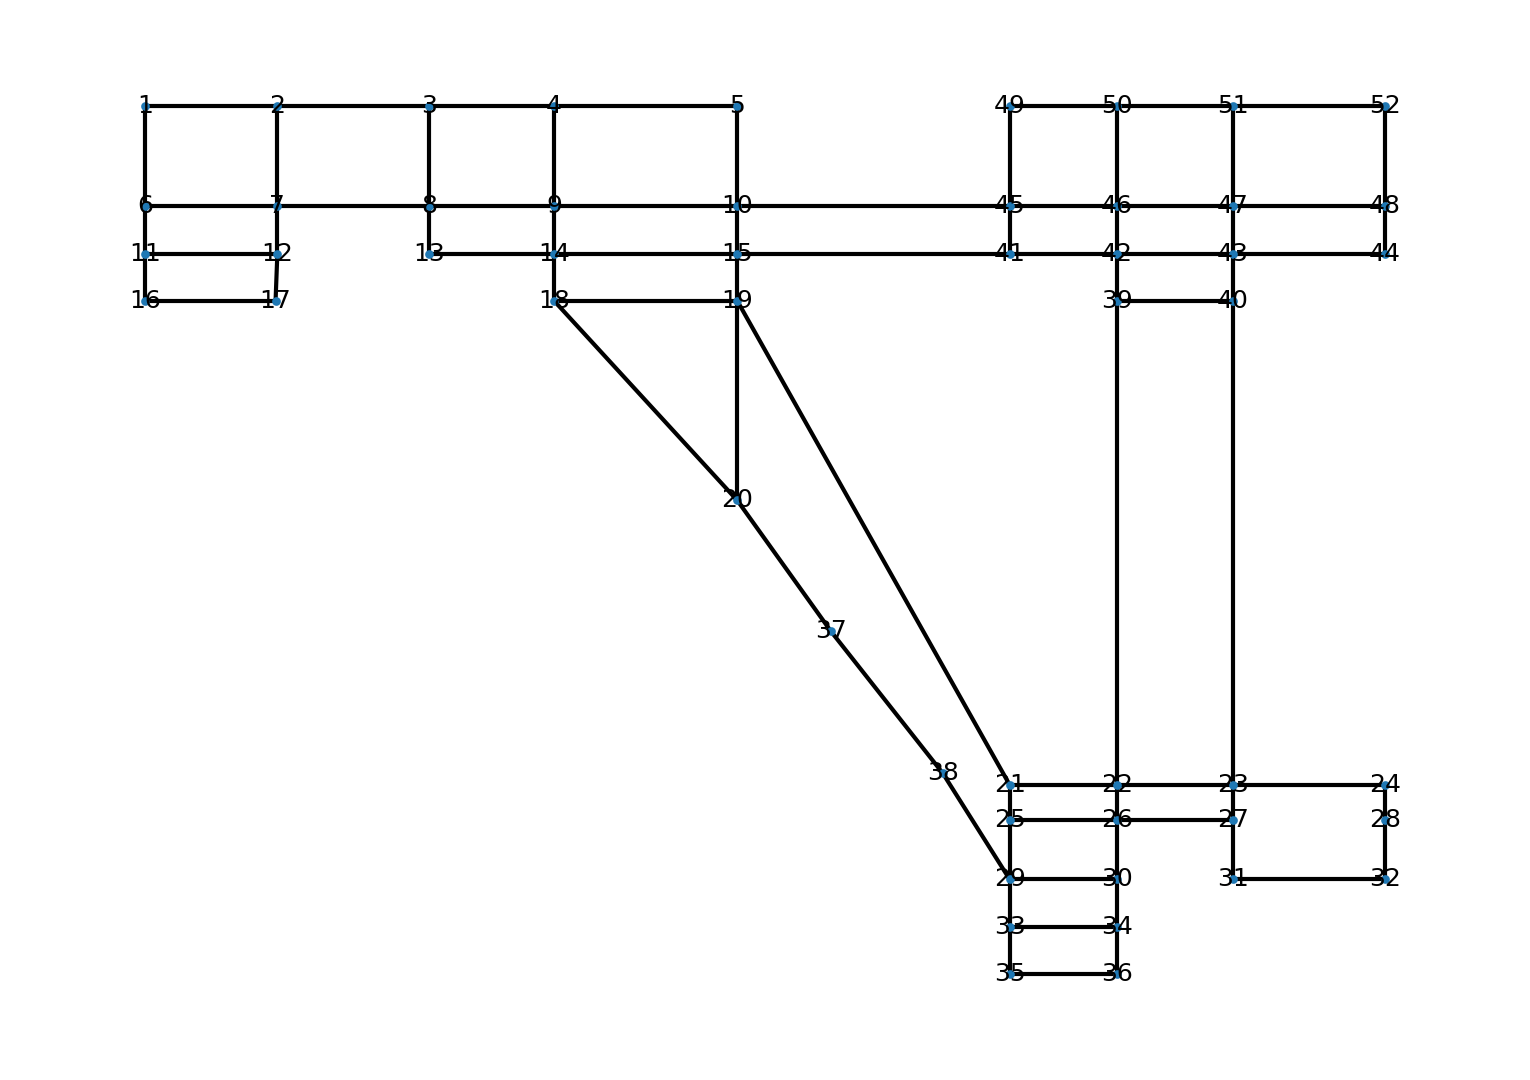

In [183]:
graph = graph.graph
fig = plt.figure(figsize=(10, 7), dpi=150)
pos = nx.get_node_attributes(graph, 'pos')

nx.draw(graph, pos=pos, node_size=10, width=2,
        with_labels=True)